<a href="https://colab.research.google.com/github/Andreaierardi/Machine-Learning-Project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [12]:
!kaggle datasets download --force -d moltean/fruits

100% 757M/760M [00:08<00:00, 111MB/s] 
100% 760M/760M [00:08<00:00, 92.1MB/s]


In [9]:
!unzip fruits.zip


unzip:  cannot find or open fruits.zip, fruits.zip.zip or fruits.zip.ZIP.


# Image classification with Neural Networks
## Machine Learning Project

Group: Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset
### 1.1 Libraries


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 

from plotnine import *
from sklearn.decomposition import PCA

from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

## 1.2 Data Loading

In [14]:
DATADIR = "fruits-360/Training"
DATADIR_test = "fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [15]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

100%|██████████| 131/131 [00:31<00:00,  4.17it/s]


In [16]:
x_train, y_train= train

In [17]:
x_test, y_test = test

### Train and test shape


In [18]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


## 1.2 Pre-processing

### Pre-process the labels and the images


In [19]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [20]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


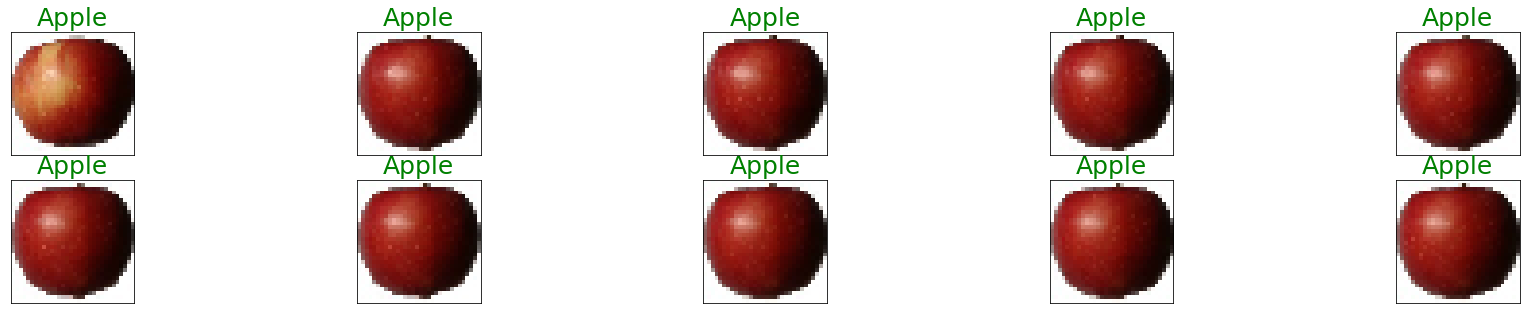

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [22]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


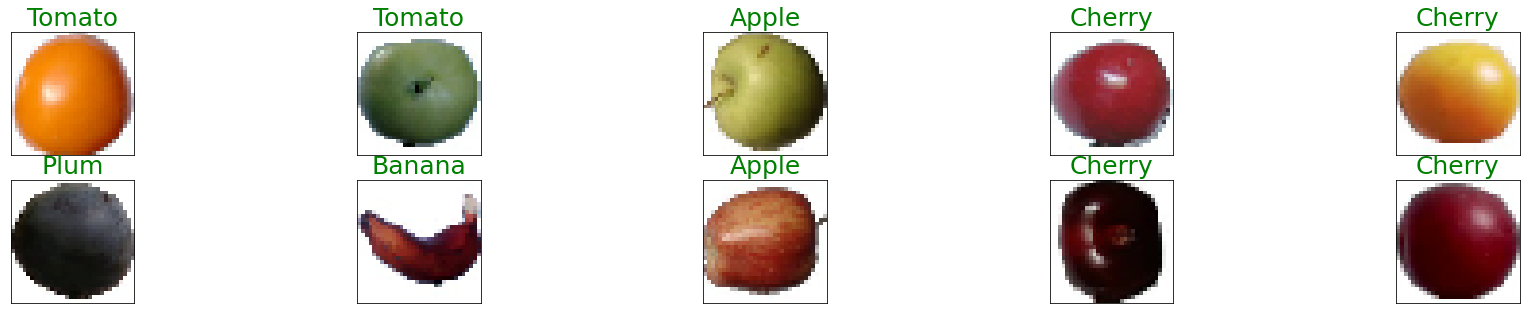

In [23]:


import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [24]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [25]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_valid = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Validation X : ',x_valid.shape)
print('Validation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Validation X :  (8724, 32, 32, 3)
Validation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


### Definition of zero-one loss function 

In [47]:
def zero_one(prediz,test):
    y_hat = []
    y_t = []
    for i in range(len(prediz)):
        y_hat.append(np.argmax(prediz[i]))
        y_t.append(np.argmax(test[i]))

   
    loss = []
    for i in range(len(prediz)):
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)


    return np.mean(loss)


## PCA and feed-forward NN


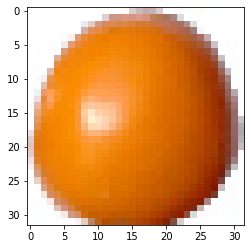

In [28]:
#attempt to plot image
plt.imshow(x_train[0])

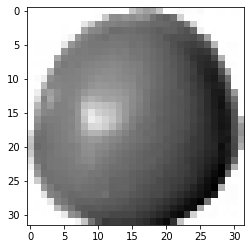

In [29]:
x_train[0].shape
type(x_train[1])
rgb_weights = [0.2989, 0.5870, 0.1140]
image_test = x_train[0]
image_grey = np.dot(image_test[...,:3], rgb_weights)
plt.imshow(image_grey, cmap=plt.get_cmap("gray"))

In [30]:
# transform my np.ndarray from rgb to grey
x_train_grey = np.ndarray(shape=(x_train.shape[0], 32, 32))
for i in range(x_train.shape[0]):
    image_convert = x_train[i]
    x_train_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

x_valid_grey = np.ndarray(shape=(x_valid.shape[0], 32, 32))
for i in range(x_valid.shape[0]):
    image_convert = x_valid[i]
    x_valid_grey[i] = np.dot(image_convert[...,:3], rgb_weights)
    
x_test_grey = np.ndarray(shape=(x_test.shape[0], 32, 32))
for i in range(x_test.shape[0]):
    image_convert = x_test[i]
    x_test_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

In [31]:
# flatten my 32x32 images by concatenating them into a vector, each column of the matrix will be an image
x_train_flat = np.ndarray(shape=(1024, x_train_grey.shape[0]))
for i in range(x_train_grey.shape[0]):
    x_train_flat[:,i] = np.concatenate(x_train_grey[i])
    
x_valid_flat = np.ndarray(shape=(1024, x_valid_grey.shape[0]))
for i in range(x_valid_grey.shape[0]):
    x_valid_flat[:,i] = np.concatenate(x_valid_grey[i])
    
x_test_flat = np.ndarray(shape=(1024, x_test_grey.shape[0]))
for i in range(x_test_grey.shape[0]):
    x_test_flat[:,i] = np.concatenate(x_test_grey[i])

In [32]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
x_train_flat_T = standard_scaler.fit_transform(x_train_flat.T)
x_valid_flat_T = standard_scaler.transform(x_valid_flat.T)
x_test_flat_T = standard_scaler.transform(x_test_flat.T)

In [33]:
x_train_flat_T.shape

(32607, 1024)

In [34]:
x_train_flat = x_train_flat_T.T
x_valid_flat = x_valid_flat_T.T
x_test_flat = x_test_flat_T.T

In [35]:
x_train_flat.shape

(1024, 32607)

In [36]:
a = np.cov(x_train_flat)
b = np.linalg.eig(a)
b[0].shape

(1024,)

In [37]:
b

(array([384.41591328,  86.57192039,  60.39849467, ...,   0.        ,
          0.        ,   0.        ]),
 array([[-2.77148730e-03,  1.99671963e-02, -7.00245270e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.06770166e-04,  5.26867240e-03, -3.60037909e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.31497722e-04,  4.57673250e-03, -2.40477865e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 9.24994377e-04,  3.61739014e-03,  2.95348978e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.13335613e-03,  5.13559532e-03,  3.96259018e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

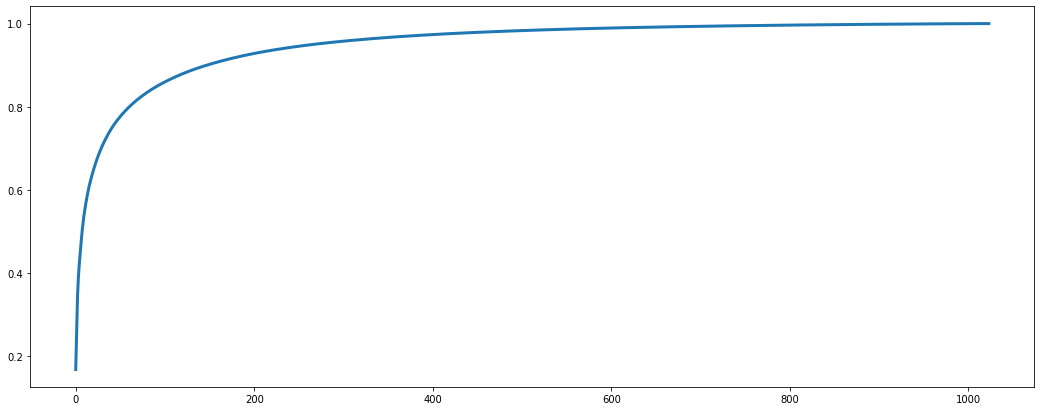

In [38]:
pca = PCA().fit(x_train_flat)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

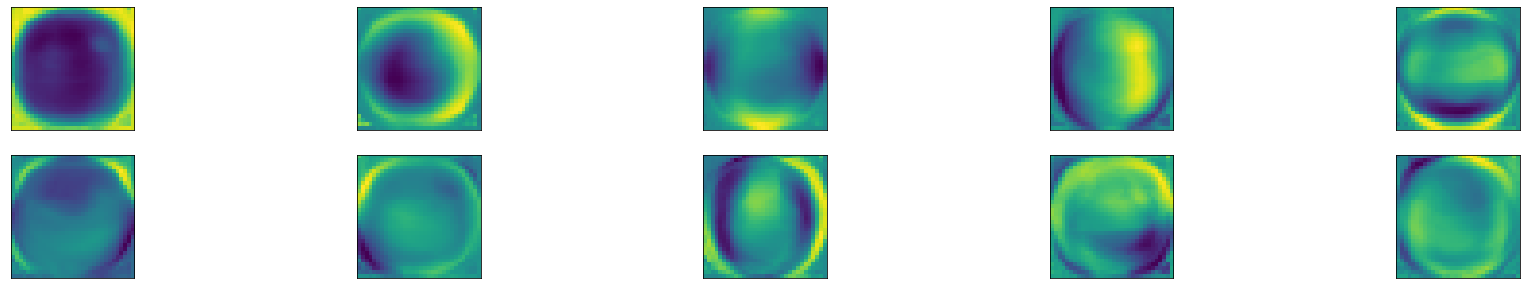

In [39]:
# try to plot some of the eigenvectors, the so called "eigenfruits"
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(b[1][:,i].reshape(32,32)))



### Reduce dimensionality of images with PCA


In [40]:
x_train_flat.shape, x_valid_flat.shape, x_test_flat.shape

((1024, 32607), (1024, 8724), (1024, 2182))

In [41]:

def PCA_iter(x_all,start, end, step):
    lis =[]
    for i in range(start, end, step):
                print("\n\n===== Component: ",i,"=====\n")
            
                (train,valid, test) = x_all
                pca = PCA(n_components=i)
                print("original shape:   ", train.shape)

                
                pca.fit_transform(train)
                
                train_PCA =  pca.transform(train)
                train_new = pca.inverse_transform(train_PCA)

                valid_PCA =  pca.transform(valid)       
                valid_new = pca.inverse_transform(valid_PCA)
                
                
                test_PCA = pca.transform(test)
                test_new = pca.inverse_transform(test_PCA)

                
                print("transformed shape:", train_PCA.shape)
                print("final shape:", train_new.shape)

                tupla = (x_train_PCA, x_valid_PCA, x_test_PCA) =train_new,valid_new,test_new
                
                lis.append(tupla)
    return lis

In [42]:
lis_PCA =  PCA_iter((x_train_flat_T,x_valid_flat_T, x_test_flat_T),10,211,20)



===== Component:  10 =====

original shape:    (32607, 1024)
transformed shape: (32607, 10)
final shape: (32607, 1024)


===== Component:  30 =====

original shape:    (32607, 1024)
transformed shape: (32607, 30)
final shape: (32607, 1024)


===== Component:  50 =====

original shape:    (32607, 1024)
transformed shape: (32607, 50)
final shape: (32607, 1024)


===== Component:  70 =====

original shape:    (32607, 1024)
transformed shape: (32607, 70)
final shape: (32607, 1024)


===== Component:  90 =====

original shape:    (32607, 1024)
transformed shape: (32607, 90)
final shape: (32607, 1024)


===== Component:  110 =====

original shape:    (32607, 1024)
transformed shape: (32607, 110)
final shape: (32607, 1024)


===== Component:  130 =====

original shape:    (32607, 1024)
transformed shape: (32607, 130)
final shape: (32607, 1024)


===== Component:  150 =====

original shape:    (32607, 1024)
transformed shape: (32607, 150)
final shape: (32607, 1024)


===== Component:  170 ==

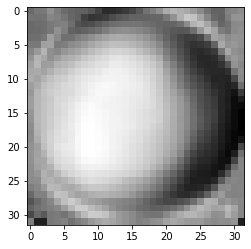

In [43]:
# with 10 components example of the same image
tr,va,te  = lis_PCA[1] 
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))

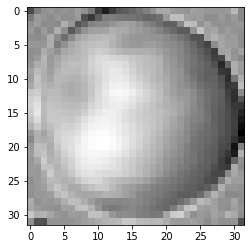

In [44]:
# with 210 components example of an image
tr,va,te  = lis_PCA[len(lis_PCA)-1]
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))


## Train feed-forward NN with reduced images


In [49]:
def FW_iter(lis_PCA, ep, bs):
    lis_FW = []
    epochs = ep
    batch_size = bs
    for itr in range(len(lis_PCA)):
        x_train_PCA, x_valid_PCA, x_test_PCA = lis_PCA[itr]
        
       
        print("FW- components: ",(itr+1)*20-10)
        #feed forward neural network
        model = tf.keras.Sequential([
          tf.keras.layers.Input(shape = (1024)),
          tf.keras.layers.Dense(32, activation = "relu"),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
        model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
        #model.summary()

        history = model.fit(x_train_PCA, y_train,
                        batch_size = bs,
                        epochs = epochs,
                        validation_data=(x_valid_PCA, y_valid),
                        verbose = 2
                      )
        
        y_pred = model.predict(x_test_PCA).round()
        
        zo_loss = zero_one(y_pred,y_test)
        print("Zero-one loss: ",zo_loss)
        tupla = (history, model, zo_loss)
        lis_FW.append(tupla)
    return lis_FW

In [50]:
epochs = 10
batch_size = 32
res = FW_iter(lis_PCA, epochs, batch_size)

FW- components:  10
Epoch 1/10
1019/1019 - 4s - loss: 0.9333 - accuracy: 0.6746 - val_loss: 1.1427 - val_accuracy: 0.6390
Epoch 2/10
1019/1019 - 4s - loss: 0.6575 - accuracy: 0.7685 - val_loss: 1.1508 - val_accuracy: 0.6588
Epoch 3/10
1019/1019 - 4s - loss: 0.5718 - accuracy: 0.8015 - val_loss: 1.1289 - val_accuracy: 0.6915
Epoch 4/10
1019/1019 - 4s - loss: 0.5150 - accuracy: 0.8217 - val_loss: 1.1696 - val_accuracy: 0.7021
Epoch 5/10
1019/1019 - 5s - loss: 0.4869 - accuracy: 0.8334 - val_loss: 1.3101 - val_accuracy: 0.6721
Epoch 6/10
1019/1019 - 5s - loss: 0.4702 - accuracy: 0.8398 - val_loss: 1.2215 - val_accuracy: 0.6844
Epoch 7/10
1019/1019 - 4s - loss: 0.4367 - accuracy: 0.8487 - val_loss: 1.2883 - val_accuracy: 0.6844
Epoch 8/10
1019/1019 - 4s - loss: 0.4234 - accuracy: 0.8539 - val_loss: 1.2360 - val_accuracy: 0.7080
Epoch 9/10
1019/1019 - 4s - loss: 0.4129 - accuracy: 0.8570 - val_loss: 1.3073 - val_accuracy: 0.6918
Epoch 10/10
1019/1019 - 4s - loss: 0.3985 - accuracy: 0.8626 -

In [51]:
df = pd.DataFrame(
columns = ['epochs', 'valid', 'components', 'accuracy', 'value']
)

for itr in range(len(res)):
  
    time =  [i for i in range(1,epochs+1)]
    valids =  [0 for i in range(1,epochs+1)]
    components = [(itr+1)*20-10 for i in range(1,epochs+1)]
   

    accur = [1 for i in range(1,epochs+1)]
    acc = res[itr][0].history['accuracy']
    
    df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    loss= res[itr][0].history['loss']
    accur = [0 for i in range(1,epochs+1)]
    df2=  pd.DataFrame(data= np.vstack((time,valids,components,accur,loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    valids =  [1 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    val_acc = res[itr][0].history['val_accuracy']
    
    df3=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    accur = [0 for i in range(1,epochs+1)]

    val_loss = res[itr][0].history['val_loss']
    df4=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])
   
    df = df.append(df1.append(df2).append(df3).append(df4))

In [52]:
df['components'] = df['components'].astype('category')
df = df.assign(accuracy = ['accuracy' if accuracy == 1. else 'loss' for accuracy in df['accuracy']])
df = df.assign(valid = ['validation' if valid == 1. else 'training' for valid in df['valid']])
df['accuracy'].unique()

array(['accuracy', 'loss'], dtype=object)

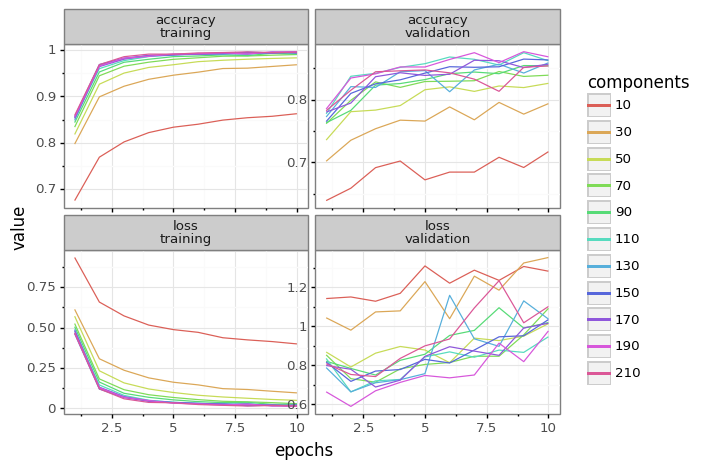

<ggplot: (-9223363246285067036)>

In [53]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid'],scales='free') +  theme_bw(base_size=12)

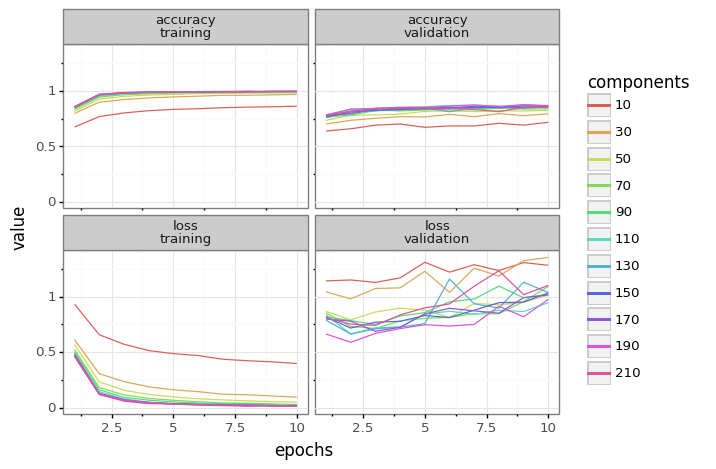

<ggplot: (8790550472354)>

In [54]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid']) + \
    theme_bw(base_size=12)

In [55]:
df_loss = pd.DataFrame(
columns = ['components', 'zero_one']
)

losses =[]

for i in range(len(res)):
    losses.append(res[i][2])
components = [i for i in range(10,211,20)]

In [56]:
df_loss = pd.DataFrame( data = [components,losses], index = ['components', 'zero_one']).T

In [57]:
df_loss

components  zero_one
0         10.0  0.289643
1         30.0  0.188818
2         50.0  0.159487
3         70.0  0.146196
4         90.0  0.132447
5        110.0  0.133364
6        130.0  0.118240
7        150.0  0.126489
8        170.0  0.135197
9        190.0  0.124198
10       210.0  0.131989

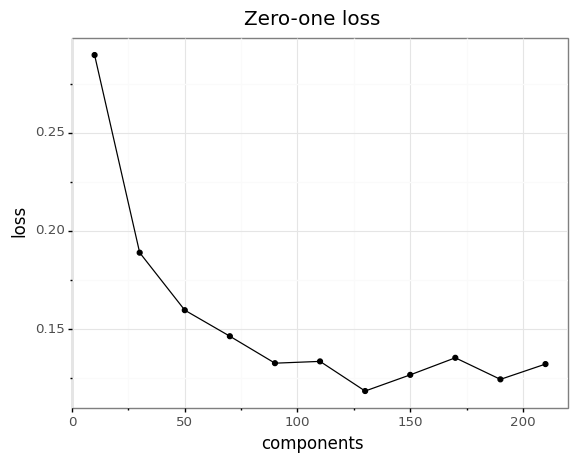

<ggplot: (-9223363246285084321)>

In [58]:
ggplot(df_loss, aes(x='components', y='zero_one')) + \
    geom_line() + \
    geom_point() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss") + ylab("loss")

# 1.3  Convolutional Neural Newtworks

## One VGG block CNN


In [60]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "1_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
___________________________________________

In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [62]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 11s - loss: 0.2229 - accuracy: 0.9277 - val_loss: 0.0891 - val_accuracy: 0.9719
Epoch 2/10
1019/1019 - 12s - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0873 - val_accuracy: 0.9841
Epoch 3/10
1019/1019 - 11s - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0688 - val_accuracy: 0.9806
Epoch 4/10
1019/1019 - 11s - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0769 - val_accuracy: 0.9817
Epoch 5/10
1019/1019 - 11s - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.1317 - val_accuracy: 0.9787
Epoch 6/10
1019/1019 - 11s - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.1662 - val_accuracy: 0.9802
Epoch 7/10
1019/1019 - 11s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1325 - val_accuracy: 0.9767
Epoch 8/10
1019/1019 - 11s - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.1943 - val_accuracy: 0.9756
Epoch 9/10
1019/1019 - 11s - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.1028 - val_accuracy: 0.9849
Epoch 10/10
1019/1019 - 10s - loss: 0.0052 - accuracy: 0.9992 - val_loss:

In [85]:
y_pred = model.predict(x_test)

zero_one(y_pred, y_test)

0.01466544454628781

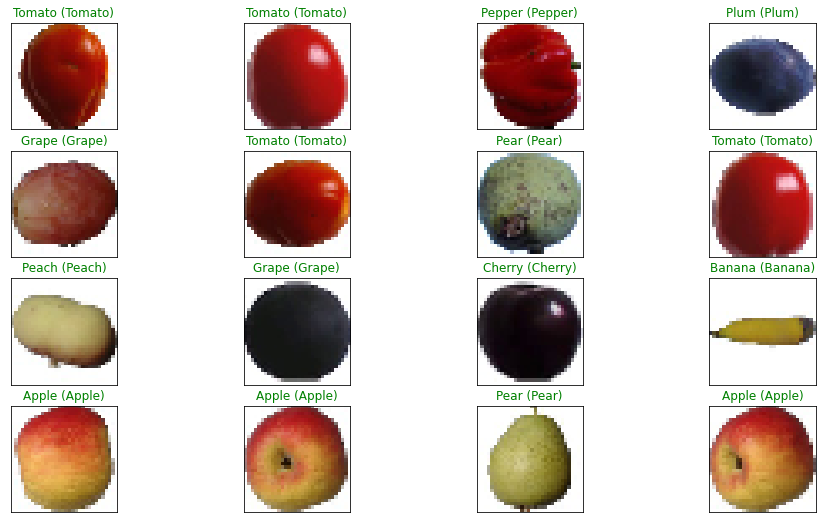

In [86]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



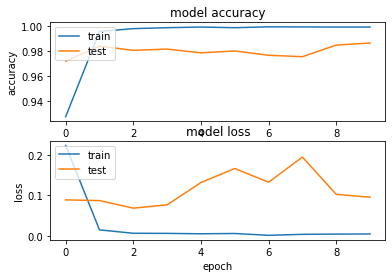

In [65]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [66]:
%load_ext tensorboard

In [67]:
%tensorboard --logdir conv_nets

<IPython.core.display.Javascript object>


## Two VGG blocks



In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "2_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)            

In [69]:
history2 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 13s - loss: 0.2431 - accuracy: 0.9177 - val_loss: 0.0959 - val_accuracy: 0.9588
Epoch 2/10
1019/1019 - 13s - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0611 - val_accuracy: 0.9764
Epoch 3/10
1019/1019 - 13s - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0557 - val_accuracy: 0.9776
Epoch 4/10
1019/1019 - 13s - loss: 3.8422e-05 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.9827
Epoch 5/10
1019/1019 - 13s - loss: 1.2501e-05 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9838
Epoch 6/10
1019/1019 - 13s - loss: 6.0544e-06 - accuracy: 1.0000 - val_loss: 0.0402 - val_accuracy: 0.9852
Epoch 7/10
1019/1019 - 13s - loss: 3.1579e-06 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9858
Epoch 8/10
1019/1019 - 13s - loss: 1.7776e-06 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 0.9861
Epoch 9/10
1019/1019 - 13s - loss: 9.8438e-07 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 10/10
1019/1019 - 13s - loss: 5.7105e-07 - 

In [70]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9890009164810181


## Three VGG blocks

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)       

In [72]:
history3 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 18s - loss: 0.3204 - accuracy: 0.8882 - val_loss: 0.1324 - val_accuracy: 0.9605
Epoch 2/10
1019/1019 - 18s - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0993 - val_accuracy: 0.9661
Epoch 3/10
1019/1019 - 18s - loss: 0.0210 - accuracy: 0.9941 - val_loss: 0.0478 - val_accuracy: 0.9876
Epoch 4/10
1019/1019 - 18s - loss: 2.8657e-05 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9898
Epoch 5/10
1019/1019 - 18s - loss: 8.6508e-06 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9896
Epoch 6/10
1019/1019 - 18s - loss: 3.9130e-06 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9900
Epoch 7/10
1019/1019 - 18s - loss: 1.9501e-06 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9907
Epoch 8/10
1019/1019 - 18s - loss: 1.0009e-06 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9909
Epoch 9/10
1019/1019 - 18s - loss: 5.5120e-07 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9912
Epoch 10/10
1019/1019 - 18s - loss: 2.9251e-07 - 

In [73]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.991292417049408


## Three VGG blocks with Dropout


In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)        

In [75]:
history4 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 19s - loss: 0.4626 - accuracy: 0.8364 - val_loss: 0.0642 - val_accuracy: 0.9741
Epoch 2/10
1019/1019 - 19s - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0693 - val_accuracy: 0.9750
Epoch 3/10
1019/1019 - 19s - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.1279 - val_accuracy: 0.9592
Epoch 4/10
1019/1019 - 19s - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0534 - val_accuracy: 0.9846
Epoch 5/10
1019/1019 - 19s - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.1514 - val_accuracy: 0.9625
Epoch 6/10
1019/1019 - 19s - loss: 0.0357 - accuracy: 0.9903 - val_loss: 0.0353 - val_accuracy: 0.9870
Epoch 7/10
1019/1019 - 19s - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.0431 - val_accuracy: 0.9899
Epoch 8/10
1019/1019 - 19s - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.0577 - val_accuracy: 0.9860
Epoch 9/10
1019/1019 - 19s - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0873 - val_accuracy: 0.9874
Epoch 10/10
1019/1019 - 19s - loss: 0.0204 - accuracy: 0.9945 - val_loss:

In [76]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9967919588088989


## Three VGG blocks with Dropout and Batch Normalization


In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout_BN"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)      

In [78]:
history5 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 22s - loss: 0.4196 - accuracy: 0.8656 - val_loss: 0.1004 - val_accuracy: 0.9626
Epoch 2/10
1019/1019 - 21s - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0598 - val_accuracy: 0.9802
Epoch 3/10
1019/1019 - 21s - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0998 - val_accuracy: 0.9740
Epoch 4/10
1019/1019 - 21s - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.4597 - val_accuracy: 0.8705
Epoch 5/10
1019/1019 - 21s - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 6/10
1019/1019 - 21s - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0244 - val_accuracy: 0.9919
Epoch 7/10
1019/1019 - 21s - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.1370 - val_accuracy: 0.9572
Epoch 8/10
1019/1019 - 21s - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0806 - val_accuracy: 0.9795
Epoch 9/10
1019/1019 - 21s - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0851 - val_accuracy: 0.9817
Epoch 10/10
1019/1019 - 21s - loss: 0.0124 - accuracy: 0.9962 - val_loss:

In [79]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.985334575176239


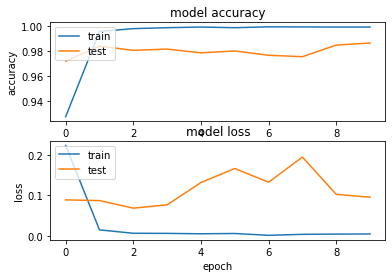

In [80]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()





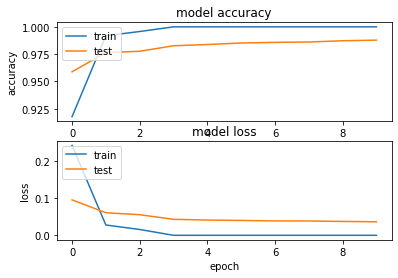

In [81]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

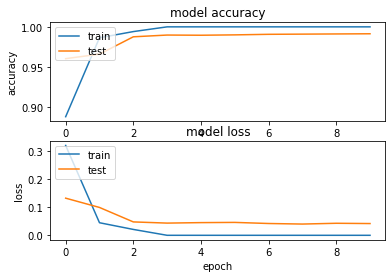

In [82]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history3.history['accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

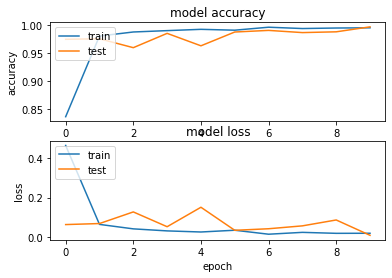

In [83]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history4.history['accuracy'])  
plt.plot(history4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

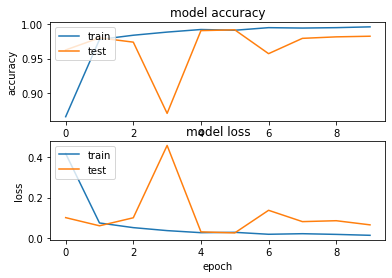

In [84]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history5.history['accuracy'])  
plt.plot(history5.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history5.history['loss'])  
plt.plot(history5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 1.5 LeNet Neural Networks


In [ ]:
#leNet Neural Network

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()



In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_vaild),
                    verbose = 2
                    )

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()



# MobileNetV2

In [ ]:
from keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')



In [ ]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()